## Imports

In [2]:
# hide
# +----------------------------------------------------+
# | NLUDB
# +----------------------------------------------------+
# default_exp demo.seed
# default_cls_lvl 3
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../src") # NLUDB Client from Dev

In [3]:
# export

import nludb # type: ignore 
from typing import Tuple, List # type: ignore 
from nludb import NLUDB, OcrModels, ClassifierModels, EmbeddingModels, AcrModels # type: ignore 
from nludb.types.file import SpanQuery

In [4]:
nludb = NLUDB(api_key="ebc4e260-95f9-4f87-8099-d3b25fa56971", api_domain="http://localhost:8080", d_query=True)

## Demo


In [5]:
URL = "https://washington.org/DC-information/washington-dc-history"

In [8]:
doc = nludb.scrape(URL)

In [9]:
doc.data.convert()

TypeError: safely_from_dict() got an unexpected keyword argument 'client'

In [7]:
doc.parse()

NameError: name 'FileParseRequest' is not defined

In [67]:
doc.dquery('sentence @"Thomas Jefferson"')

,Type,Value
0,sentence,"Like many decisions in American history, the l..."
1,sentence,Thomas Jefferson later replenished the library...


In [45]:
index = doc.index(blockType='sentence')

In [46]:
index.search("Who was chosen to design Washington DC?", pd=True)

,Score,Value
0,0.444388,"To design the city, he appointed Pierre Charle..."


## Adding a Hugging Face Classifier

In [47]:
model = nludb.models.create(
   name='demo-classifier',
   handle='demo-classifier',
   description='Demo of loading a third-party model',
   isPublic=False,
   apiKey='api_phAperAfoRmfzbmaQUSDomPPCKNcQEtOwW',
   modelType='classifier',
   adapterType='huggingface',
   url='https://api-inference.huggingface.co/models/facebook/bart-large-mnli',
   upsert=True
).data

In [48]:
classifier = nludb.create_classifier(
    name="Zero Shot",
    model=model.handle,
    save=False
)

In [49]:
LABELS = ["Apparel", "Sports", "Electronics"]

In [50]:
classifier.classify(docs=[
    "Three pack of tennis balls"
], labels=LABELS, pd=True)

,Score,Value
0,0.980413,Sports


## PDF / Image / Audio - No Problem 

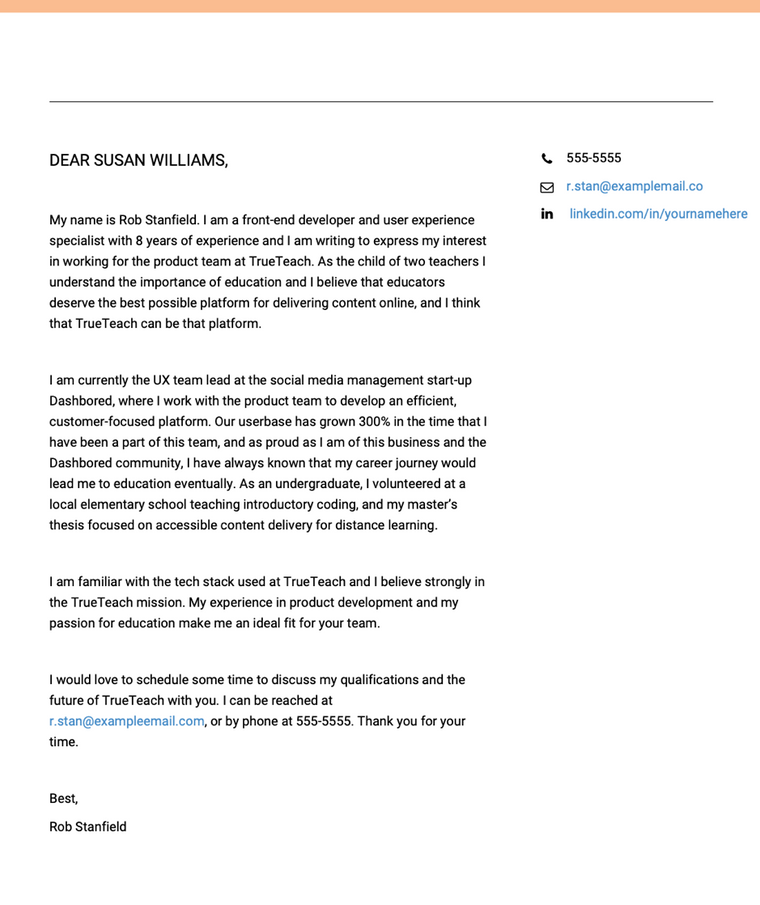

In [38]:
from IPython.display import Image
Image(filename='cover-letter.png') 

In [39]:
letter = nludb.upload(filename="cover-letter.png")

In [40]:
letter.convert(ocrModel = OcrModels.MS_VISION_DEFAULT)

In [41]:
letter.parse()

In [81]:
letter.dquery('sentence')

,Type,Value
0,sentence,"DEAR SUSAN WILLIAMS, 555-5555"
1,sentence,r.stan@examplemail.co
2,sentence,My name is Rob Stanfield.
3,sentence,I am a front-end developer and user experience
4,sentence,in linkedin.com/in/yournamehere
5,sentence,specialist with 8 years of experience and I am...
6,sentence,in working for the product team at TrueTeach
7,sentence,.
8,sentence,As the child of two teachers I
9,sentence,understand the importance of education and I b...


## Audio Pattern Matching

In [42]:
audio = nludb.upload(filename='test.mp3')

In [83]:
audio.convert(acrModel = AcrModels.ASSEMBLY_DEFAULT)

In [112]:
audio.parse()

In [113]:
audio.query()

[Block(blockId='AAC279E7-45FA-4F93-A67B-272698A62EE5', type='sentence', value='This is a test.'),
 Block(blockId='36130615-2CB2-41F9-9B99-8A5852D644CC', type='sentence', value='Can you hear me.'),
 Block(blockId='27BEB852-9D7A-4879-AEDF-5B20012F48BD', type='doc', value=None),
 Block(blockId='A7653B8E-DA72-4E4D-95BF-79DCBC5BA36D', type='page', value='This is a test. Can you hear me.')]